In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\Users\Pishtaz\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_csv('final_training_dataset.csv')
df.dropna(axis=0, inplace=True)
df.drop('Date', axis=1, inplace=True)
df.head()

C:\Users\Pishtaz\AppData\Local\Temp\ipykernel_10912\1180228276.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_training_dataset.csv')


,StnId,100,200,300,400,500,600,700,800,900,...,1600,1700,1800,1900,2000,2100,2200,2300,2400,ETo_sum_day
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,101.0,...,166.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,74.0,...,92.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,33.0,...,85.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.96
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,...,58.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,97.0,...,170.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.18


In [3]:
df.shape

(768666, 26)

In [4]:
df.describe()

,StnId,100,200,300,400,500,600,700,800,900,...,1600,1700,1800,1900,2000,2100,2200,2300,2400,ETo_sum_day
count,768666.000000,768666.000000,768666.000000,768666.000000,768666.00000,768666.000000,768666.000000,768666.000000,768666.000000,768666.000000,...,768666.000000,768666.000000,768666.000000,768666.000000,768666.000000,768666.00000,768666.000000,768666.000000,768666.000000,768666.000000
mean,128.973434,0.189168,0.181016,0.182465,0.18658,0.696486,17.558829,85.200014,210.822303,371.027174,...,382.431574,224.568729,95.557168,22.021137,1.114634,0.14716,0.156061,0.166157,0.176611,3.798380
std,68.781799,9.003488,3.662113,3.391114,3.07660,3.380886,29.806293,95.164903,159.950893,201.769104,...,201.777239,167.009422,104.062096,37.051593,5.848389,4.99481,5.137258,4.904804,4.763015,2.154707
min,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,63.000000,194.000000,...,198.000000,57.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.010000
50%,135.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,45.000000,178.000000,372.000000,...,391.000000,208.000000,51.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.610000
75%,187.000000,0.000000,0.000000,0.000000,0.00000,1.000000,21.000000,150.000000,354.000000,554.000000,...,568.000000,378.000000,180.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.360000
max,260.000000,6999.000000,899.000000,880.000000,709.00000,582.000000,737.000000,1144.000000,2245.000000,1775.000000,...,3215.000000,2417.000000,1470.000000,931.000000,960.000000,953.00000,904.000000,885.000000,928.000000,53.600000


In [11]:
# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

# X = df.iloc[:,:-1]
# calc_vif(X).sort_values(by='VIF', ascending=False)

,variables,VIF
12,1200,143.206400
13,1300,137.263249
11,1100,135.625280
14,1400,129.273963
15,1500,116.753397
10,1000,112.224806
16,1600,99.048823
9,900,86.064502
17,1700,65.406072
8,800,57.699339


# Pearson correlation

In [5]:
pd.DataFrame(df.drop(columns=['StnId']).corr(method='pearson')['ETo_sum_day'],columns=['ETo_sum_day']).sort_values(by='ETo_sum_day', ascending=False)

,ETo_sum_day
ETo_sum_day,1.000000
900,0.870328
800,0.866344
1000,0.860719
1100,0.847154
1200,0.834560
1300,0.825929
700,0.825462
1400,0.820619
1500,0.815164


<AxesSubplot:>

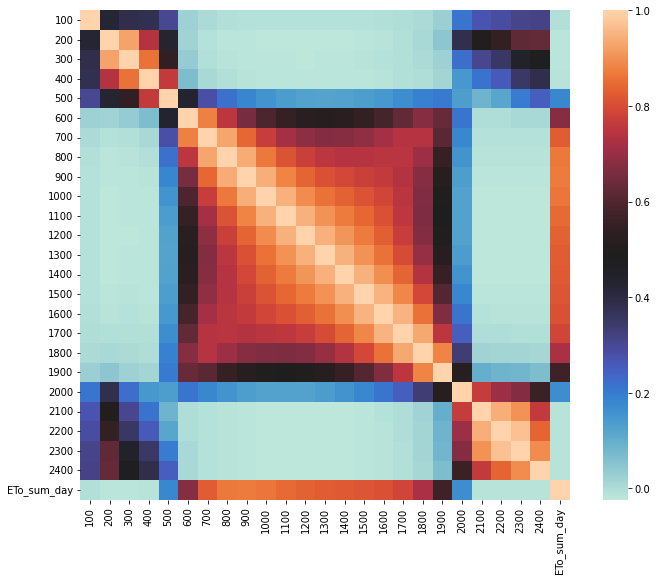

In [6]:
#correlation matrix
corrmat = df.drop(columns=['StnId']).corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap="icefire")

# Spearsman correlation

In [7]:
pd.DataFrame(df.drop(columns=['StnId']).corr(method='spearman')['ETo_sum_day'],columns=['ETo_sum_day']).sort_values(by='ETo_sum_day', ascending=False)

,ETo_sum_day
ETo_sum_day,1.000000
1000,0.889967
900,0.888222
800,0.885897
1100,0.885549
700,0.878141
1200,0.877172
1300,0.866891
1400,0.854974
1500,0.841683


# Mutual info correlation

In [8]:
X=df.drop(columns=['ETo_sum_day'], axis=1)
y=df['ETo_sum_day']

In [9]:
mutual_info_col = mutual_info_regression(X,y)

In [10]:
df_columns=pd.DataFrame(list(df.columns[:-1]), columns=['Hour'])
df_ETo=pd.DataFrame(list(mutual_info_col), columns=['Correlation_wih_ETo'])

In [11]:
pd.concat([df_columns,df_ETo],axis=1).sort_values(by='Correlation_wih_ETo', ascending=False)

,Hour,Correlation_wih_ETo
11,1100,0.826572
10,1000,0.815454
12,1200,0.808385
9,900,0.781744
13,1300,0.766897
8,800,0.745073
14,1400,0.711595
7,700,0.700437
15,1500,0.651479
16,1600,0.595308


In [15]:
# df_pearson_corr = df.drop(columns=['100.0','200.0','300.0','400.0','500.0',
#                  '800.0','900.0','1000.0','1100.0',
#                  '1200.0','1300.0','1400.0','1500.0','1600.0',
#                  '1700.0','2100.0','2200.0','2300.0','2400.0'],
#                  axis=1)

In [16]:
# X = df_pearson_corr.iloc[:,:-1]
# calc_vif(X).sort_values(by='VIF', ascending=False)

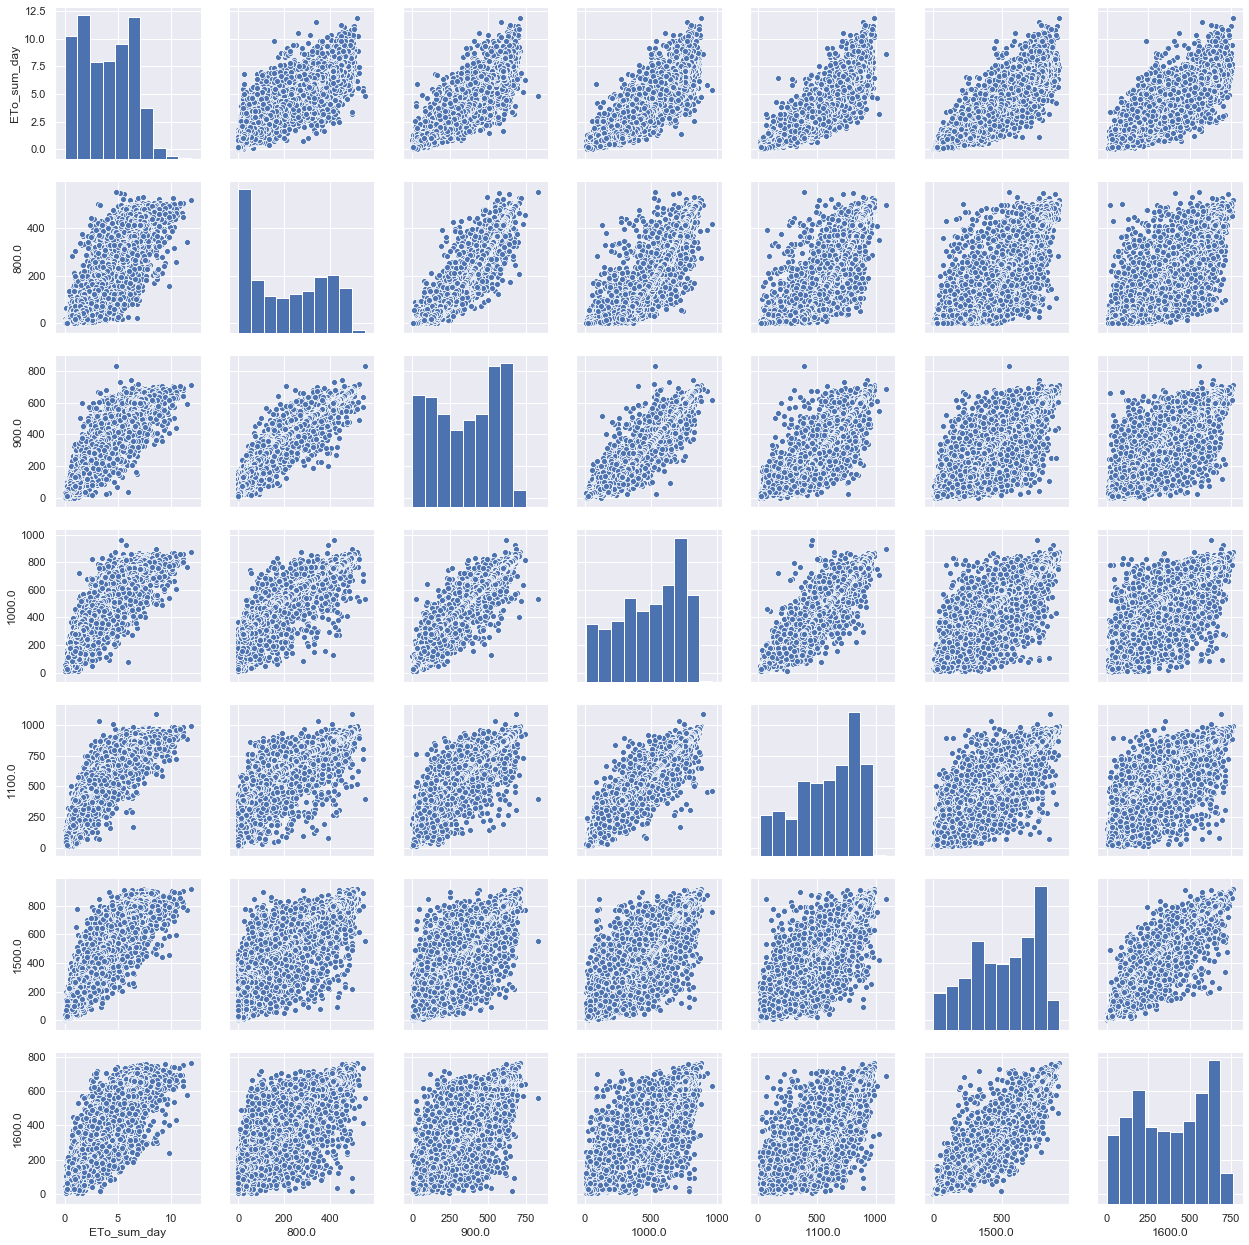

In [19]:
#scatterplot

# sns.set()
# cols = ['ETo_sum_day', '800.0', '900.0', '1000.0', '1100.0', '1500.0', '1600.0']
# sns.pairplot(df[cols], height = 2.5)
# plt.show()

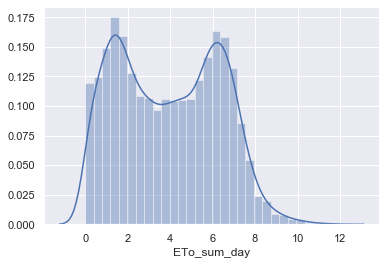

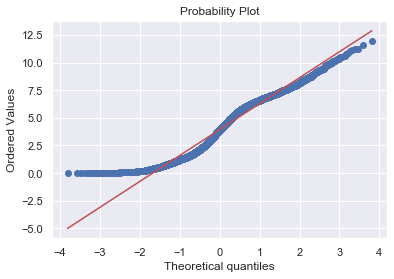

In [20]:
#histogram and normal probability plot

# sns.distplot(df['ETo_sum_day'])
# fig = plt.figure()
# res = stats.probplot(df['ETo_sum_day'], plot=plt)

In [21]:
# df['ETo_sum_day'].quantile(0.99)

8.8775

# Feature importance analysis

## CatBoost Feature Importance

In [12]:
X = df.drop(columns=['ETo_sum_day','StnId'], axis=1)
y = df['ETo_sum_day']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
import catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations = 800,
                           learning_rate = 0.01,
                           depth = 9,
                           l2_leaf_reg = 0.001,
                           loss_function = 'RMSE',
                           custom_metric = 'RMSE',
                           task_type = 'CPU',
                           verbose = 200,
                           boosting_type = 'Ordered',
                           thread_count = -1)

In [15]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.1360426	test: 2.1397418	best: 2.1397418 (0)	total: 730ms	remaining: 9m 43s
200:	learn: 0.8738187	test: 0.8836524	best: 0.8836524 (200)	total: 2m 20s	remaining: 6m 58s
400:	learn: 0.8098143	test: 0.8211694	best: 0.8211694 (400)	total: 4m 50s	remaining: 4m 49s
600:	learn: 0.7997628	test: 0.8117525	best: 0.8117525 (600)	total: 7m 23s	remaining: 2m 26s
799:	learn: 0.7940332	test: 0.8066554	best: 0.8066554 (799)	total: 9m 48s	remaining: 0us

bestTest = 0.8066553754
bestIteration = 799



In [16]:
model.get_feature_importance()

array([ 0.21149858,  0.47239486,  0.46044081,  0.6967869 ,  2.34064163,
        9.6006952 , 19.03950269,  9.83655005,  8.2933582 ,  8.05633465,
        5.60702125,  6.45250553,  5.95723286,  5.41700075,  3.89467103,
        2.8956168 ,  2.19988837,  2.6255486 ,  3.22618194,  1.88350918,
        0.06570381,  0.16746115,  0.18369353,  0.41576162])

In [17]:
X_train_cols = [('hr_'+str(i)) for i in X_train.columns]
feature_importance_df = pd.DataFrame({'feature_importance': model.get_feature_importance(), 
              'feature_names': X_train_cols}).sort_values(by=['feature_importance'], ascending=False)

feature_importance_df

,feature_importance,feature_names
6,19.039503,hr_700
7,9.836550,hr_800
5,9.600695,hr_600
8,8.293358,hr_900
9,8.056335,hr_1000
11,6.452506,hr_1200
12,5.957233,hr_1300
10,5.607021,hr_1100
13,5.417001,hr_1400
14,3.894671,hr_1500


Text(0.5, 1.0, 'CatBoost features importance:')

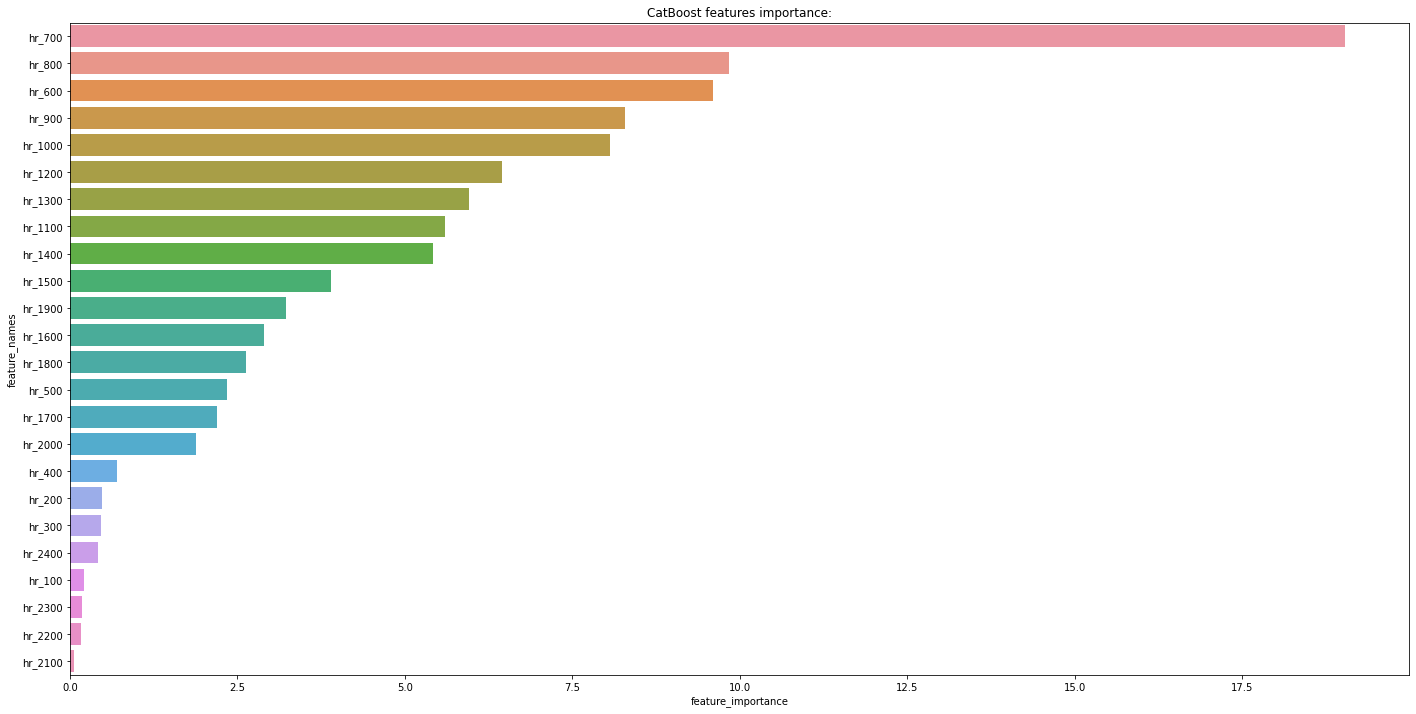

In [18]:
plt.figure(figsize=(24, 12))
sns.barplot(x=feature_importance_df["feature_importance"], y=feature_importance_df["feature_names"])
plt.title('CatBoost features importance:')

## Recursive Feature Elimination

In [29]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestRegressor

In [30]:
# rf = RandomForestRegressor(n_estimators=1000,  max_depth=10, n_jobs=-1)

In [31]:
# rfecv = RFECV(estimator=rf, step=1, scoring='neg_mean_squared_error',
#               cv=5, verbose=1, n_jobs=-1)
# X = df.drop(columns=['Year','ETo_sum_day'], axis=1)
# y = df['ETo_sum_day']

In [32]:
# rfecv.fit(X, y)

In [33]:
# rfecv.transform(X)

In [34]:
# rfecv.ranking_